# Importing packages

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Importing database

In [46]:
df = pd.read_csv('/content/drive/MyDrive/ForCoding/LSTM-Multivariate_pollution.csv', parse_dates=['date'], index_col='date')
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [47]:
df.shape

(43800, 8)

In [48]:
df.columns

Index(['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [50]:
df.describe()

,pollution,dew,temp,press,wnd_spd,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


# OneHot Encodding on wnd_dir column

In [51]:
encoder = LabelEncoder()
df['wnd_dir'] = encoder.fit_transform(df['wnd_dir'])
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


# Standardization

In [52]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled

array([[0.12977867, 0.35294118, 0.24590164, ..., 0.00229001, 0.        ,
        0.        ],
       [0.14889336, 0.36764706, 0.24590164, ..., 0.00381099, 0.        ,
        0.        ],
       [0.15995976, 0.42647059, 0.2295082 , ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.26470588, 0.26229508, ..., 0.41399641, 0.        ,
        0.        ],
       [0.00804829, 0.26470588, 0.24590164, ..., 0.42086644, 0.        ,
        0.        ],
       [0.01207243, 0.27941176, 0.26229508, ..., 0.4262155 , 0.        ,
        0.        ]])

In [53]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
df = scaled_df
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0
2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0
2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0
2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
2014-12-31 20:00:00,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
2014-12-31 21:00:00,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0


# Multivariable RNN

In [74]:
def create_sequences(data, window_size):
    xs, ys = [], []
    for i in range(len(data) - window_size-1):
        x = data[i:i+window_size]
        y = data[i+window_size+1, 0]  # Pollution column as output
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [75]:
# 24 hour

X, y = create_sequences(scaled, 24)

## Train-Test split

In [76]:
split_threshold = int(0.8 * len(X))
X_train, X_test = X[:split_threshold], X[split_threshold:]
y_train, y_test = y[:split_threshold], y[split_threshold:]

print(f'X_train: {X_train.shape} \n X_test: {X_test.shape}')

X_train: (35020, 24, 8) 
 X_test: (8755, 24, 8)


## Defining model
### RNN by  GRU (Gated Recurrent Unit)

In [77]:
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(24, X.shape[2]), return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [79]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 24, 100)             │          33,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,555 (654.52 KB)

 Trainable params: 55,851 (218.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 111,704 (436.35 KB)

## Training model

In [78]:
Hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 6/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - loss: 0.0015 - val_loss: 9.5858e-04
Epoch 7/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - loss: 0.0015 - val_loss: 9.9050e-04
Epoch 8/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - loss: 0.0014 - val_loss: 9.6205e-04
Epoch 9/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - loss: 0.0014 - val_loss: 9.8263e-04
Epoch 10/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - loss: 0.0014 - val_loss: 9.8550e-04
Epoch 11/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - loss: 0.0013 - val_loss: 9.5401e-04
Epoch 

## Evaluation model

In [80]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0014
Test loss: 0.001130504417233169


In [81]:
y_pred = model.predict(X_test)

274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


### Return Projected Data to Original Scale

In [71]:
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled.shape[1] - 1))), axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled.shape[1] - 1))), axis=1))[:, 0]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [82]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 529.6424798431109


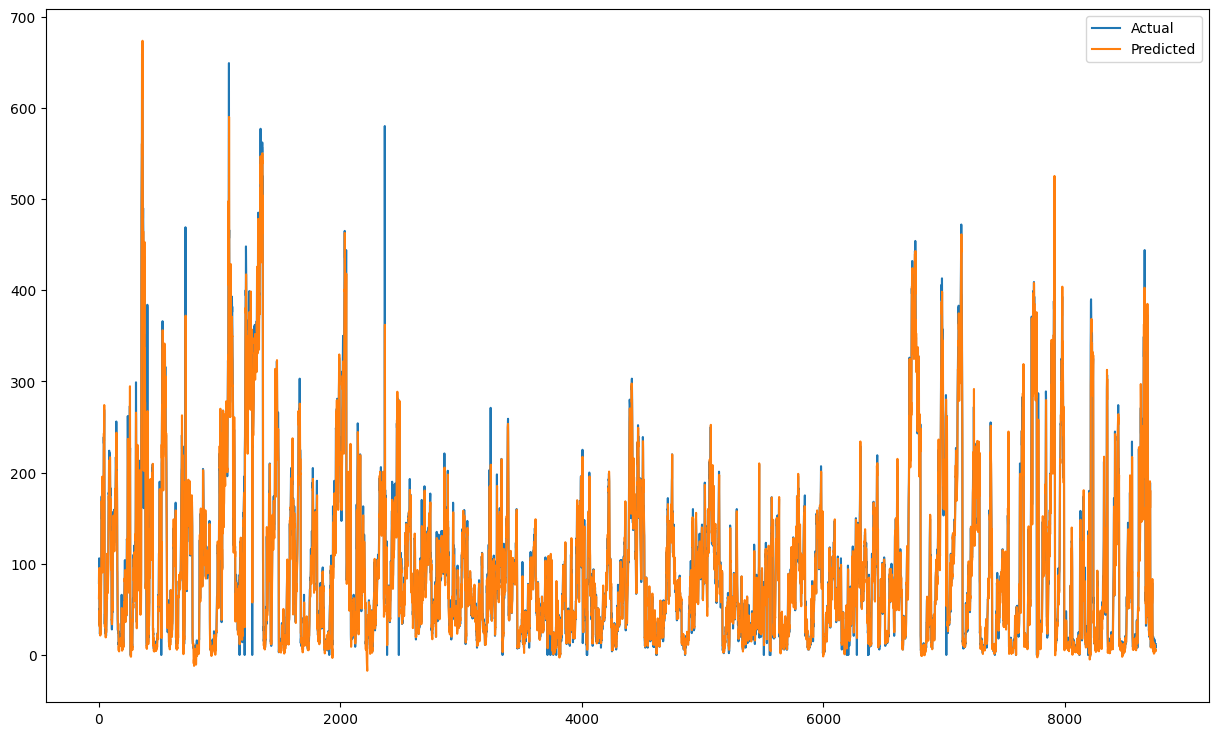

In [83]:
plt.figure(figsize=(15, 9))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()

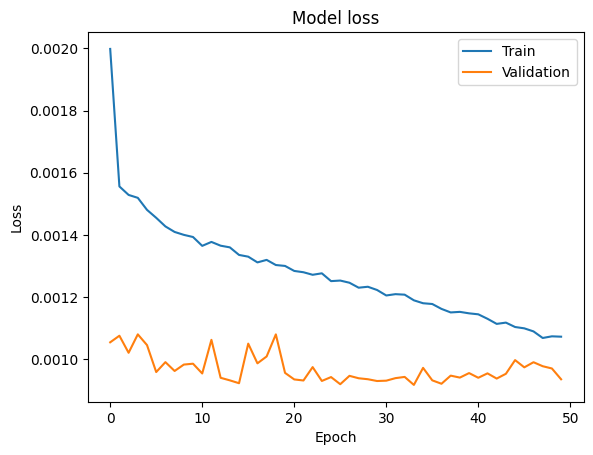

In [84]:
def plot_loss(Hist):
    plt.plot(Hist.history['loss'])
    plt.plot(Hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

plot_loss(Hist)